In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras.utils import to_categorical #For One-hot Encoding
from keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping



Using TensorFlow backend.


In [2]:
#Cheking datasets
import os
paths = os.listdir(path="./chest-xray-pneumonia")
print(paths)

['chest_xray']


In [3]:
path_train = "./chest-xray-pneumonia/chest_xray/chest_xray/train"
path_val = "./chest-xray-pneumonia/chest_xray/chest_xray/val"
path_test = "./chest-xray-pneumonia/chest_xray/test"


In [4]:
img = glob(path_train+"/PNEUMONIA/*.jpeg") #Getting all images in this folder

In [5]:
img = np.asarray(plt.imread(img[0]))

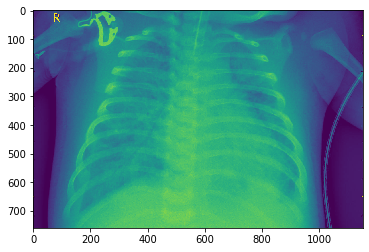

In [6]:
plt.imshow(img)

In [7]:
img.shape

(760, 1152)

In [9]:
#Data preprocessing and analysis
classes = ["NORMAL", "PNEUMONIA"]
train_data = glob(path_train+"/NORMAL/*.jpeg")
train_data += glob(path_train+"/PNEUMONIA/*.jpeg")
data_gen = ImageDataGenerator() #Augmentation happens here
#But in this example we're not going to give the ImageDataGenerator method any parameters to augment our data.


In [10]:
train_batches = data_gen.flow_from_directory(path_train, target_size = (226, 226), classes = classes, class_mode = "categorical")
val_batches = data_gen.flow_from_directory(path_val, target_size = (226, 226), classes = classes, class_mode = "categorical")
test_batches = data_gen.flow_from_directory(path_test, target_size = (226, 226), classes = classes, class_mode = "categorical")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [11]:
train_batches.image_shape

(226, 226, 3)

In [12]:
#This is a Convolutional Artificial Neural Network
#VGG16 Model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 226, 226, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 228, 228, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 226, 226, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 113, 113, 128)     73856     
__________

In [ ]:
optimizer = Adam(lr = 0.0001)
early_stopping_monitor = EarlyStopping(patience = 3, monitor = "val_acc", mode="max", verbose = 2)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
history = model.fit_generator(epochs=5, callbacks=[early_stopping_monitor], shuffle=True, validation_data=val_batches, generator=train_batches, steps_per_epoch=500, validation_steps=10,verbose=2)
prediction = model.predict_generator(generator=train_batches, verbose=2, steps=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
